In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# مكتبة اختيارية للرسوم التفاعلية (اختياري)
import plotly.express as px

# إعداد شكل الرسومات
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")




In [ ]:
from google.colab import files
uploaded = files.upload()  # 🔼 سيظهر زر لاختيار الملف من جهازك


Saving eda_metro_interstate_traffic_colab.py to eda_metro_interstate_traffic_colab.py


In [ ]:
from google.colab import files
import zipfile
import pandas as pd

# 🔼 رفع ملف الـ ZIP
uploaded = files.upload()

# الحصول على الاسم
zip_name = list(uploaded.keys())[0]

# 📦 فك الضغط
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("/content")

print("✅ تم فك الضغط بنجاح!")

# 🔹 قراءة الملف بعد فك الضغط
df = pd.read_csv("/content/Metro_Interstate_Traffic_Volume.csv")
df.head()


Saving archive.zip to archive (1).zip
✅ تم فك الضغط بنجاح!


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
# ================================
# المرحلة 2: تحميل البيانات ومعاينتها
# ================================

# تحميل البيانات من ملف CSV
# يمكنك رفع الملف إلى Colab ثم تعديل المسار أدناه
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# عرض أول 5 صفوف للتأكد من شكل البيانات
display(df.head())

# معلومات عن أنواع البيانات وعدد القيم المفقودة
df.info()

# الإحصاءات الوصفية العامة
df.describe(include='all')


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,61,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,11,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,Labor Day,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-04-18 22:00:00,NaN
freq,7,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


In [ ]:
# ================================
# المرحلة 3: معالجة الوقت
# ================================

# تحويل العمود date_time إلى نوع تاريخي
df['date_time'] = pd.to_datetime(df['date_time'])

# استخراج الساعة واليوم والشهر لتسهيل التحليل
df['hour'] = df['date_time'].dt.hour
df['dayofweek'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month

df[['date_time', 'hour', 'dayofweek', 'month']].head()


,date_time,hour,dayofweek,month
0,2012-10-02 09:00:00,9,1,10
1,2012-10-02 10:00:00,10,1,10
2,2012-10-02 11:00:00,11,1,10
3,2012-10-02 12:00:00,12,1,10
4,2012-10-02 13:00:00,13,1,10


In [ ]:
# ================================
# المرحلة 4: التحليل الإحصائي
# ================================

# المتوسط والوسيط والمنوال
mean_val = df['traffic_volume'].mean()
median_val = df['traffic_volume'].median()
mode_val = df['traffic_volume'].mode()[0]

# المدى والانحراف المعياري
range_val = df['traffic_volume'].max() - df['traffic_volume'].min()
std_val = df['traffic_volume'].std()

print(f"📊 المتوسط: {mean_val:.2f}")
print(f"📊 الوسيط: {median_val:.2f}")
print(f"📊 المنوال: {mode_val}")
print(f"📊 المدى: {range_val}")
print(f"📊 الانحراف المعياري: {std_val:.2f}")


📊 المتوسط: 3259.82
📊 الوسيط: 3380.00
📊 المنوال: 353
📊 المدى: 7280
📊 الانحراف المعياري: 1986.86


In [ ]:
# ================================
# المرحلة 5: الالتواء والتفلطح
# ================================

skewness = df['traffic_volume'].skew()
kurtosis = df['traffic_volume'].kurtosis()

print(f"📈 Skewness (الالتواء): {skewness:.2f}")
print(f"📈 Kurtosis (التفلطح): {kurtosis:.2f}")


📈 Skewness (الالتواء): -0.09
📈 Kurtosis (التفلطح): -1.31


In [ ]:
# ================================
# المرحلة 6: تجميع حسب حالة الطقس
# ================================

weather_group = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std']).sort_values(by='mean', ascending=False)
display(weather_group)


,mean,std
weather_main,,
Clouds,3618.449749,1906.202879
Haze,3502.101471,1873.511057
Rain,3317.905501,1982.228705
Drizzle,3290.727073,1997.901830
Smoke,3237.650000,1978.015893
Clear,3055.908819,1987.101411
Snow,3016.844228,1900.185883
Thunderstorm,3001.620890,1988.296012
Mist,2932.956639,2073.025670


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1575 (\N{ARABIC LETTER ALEF}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1604 (\N{ARABIC LETTER LAM}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1578 (\N{ARABIC LETTER TEH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1603 (\N{ARABIC LETTER KAF}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/py

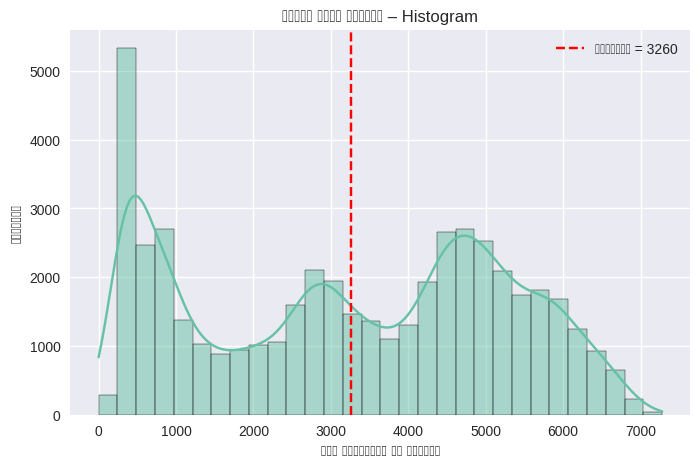

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.axvline(mean_val, color='red', linestyle='--', label=f'المتوسط = {mean_val:.0f}')
plt.title("توزيع حركة المرور – Histogram")
plt.xlabel("عدد السيارات في الساعة")
plt.ylabel("التكرار")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1604 (\N{ARABIC LETTER LAM}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1581 (\N{ARABIC LETTER HAH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1585 (\N{ARABIC LETTER REH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1603 (\N{ARABIC LETTER KAF}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/pyt

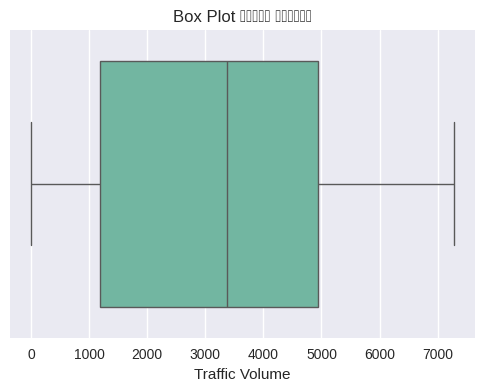

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['traffic_volume'])
plt.title("Box Plot لحركة المرور")
plt.xlabel("Traffic Volume")
plt.show()


/tmp/ipython-input-1091445337.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1091445337.py:16: UserWarning:

Glyph 1578 (\N{ARABIC LETTER TEH}) missing from font(s) Liberation Sans.

/tmp/ipython-input-1091445337.py:16: UserWarning:

Matplotlib currently does not support Arabic natively.

/tmp/ipython-input-1091445337.py:16: UserWarning:

Glyph 1571 (\N{ARABIC LETTER ALEF WITH HAMZA ABOVE}) missing from font(s) Liberation Sans.

/tmp/ipython-input-1091445337.py:16: UserWarning:

Glyph 1579 (\N{ARABIC LETTER THEH}) missing from font(s) Liberation Sans.

/tmp/ipython-input-1091445337.py:16: UserWarning:

Glyph 1610 (\N{ARABIC LETTER YEH}) missing from font(s) Liberation Sans.

/tmp/ipython-input-1091445337.py:16: UserWarning:

Glyph 1585 (\N{ARABIC LETTER REH}) missing from font(s) Liberation Sans.

/tmp/ipython-input-109144533

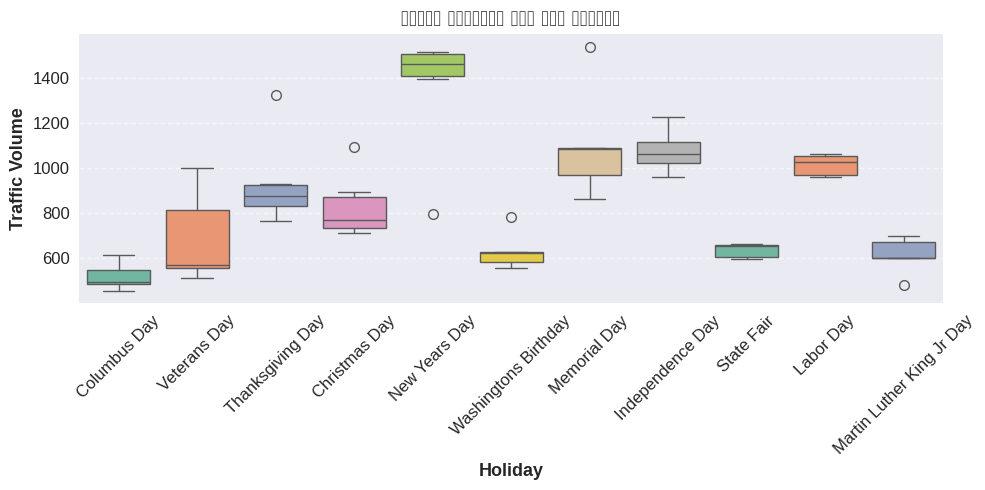

In [ ]:
plt.figure(figsize=(10,5))  # 🔹 زيادة حجم الرسم
sns.boxplot(
    x='holiday',
    y='traffic_volume',
    data=df,
    palette='Set2'  # 🎨 لوحة ألوان جميلة ومختلفة
)

plt.title("تأثير العطلات على حجم المرور", fontsize=16, fontweight='bold', color='#333')
plt.xlabel("Holiday", fontsize=13, fontweight='bold')
plt.ylabel("Traffic Volume", fontsize=13, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)  # 🔹 إضافة شبكة خفيفة
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1582 (\N{ARABIC LETTER KHAH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1585 (\N{ARABIC LETTER REH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1610 (\N{ARABIC LETTER YEH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1591 (\N{ARABIC LETTER TAH}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/py

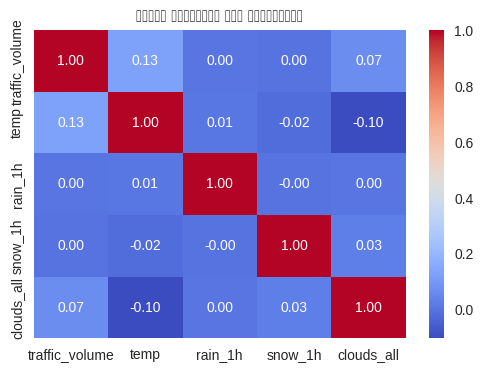

In [ ]:
# ================================
# المرحلة 8: مصفوفة الترابط
# ================================

corr = df[['traffic_volume','temp','rain_1h','snow_1h','clouds_all']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("خريطة الارتباط بين المتغيرات")
plt.show()


In [ ]:
# ================================
# المرحلة 9: الرسم التفاعلي
# ================================

fig = px.scatter(df, x='temp', y='traffic_volume',
                 color='weather_main',
                 hover_data=['weather_description'],
                 title="العلاقة بين درجة الحرارة وحركة المرور")
fig.show()
